<a href="https://colab.research.google.com/github/giaminh8368/Samsung-Innovation-Campus/blob/main/Chapter%207/ex_0515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.imdb import load_data, get_word_index
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
n_words = 3000
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words)
n_train_size = X_train.shape[0]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

2

In [5]:
my_dict = get_word_index(path='imdb_word_index.json')

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
my_dict_inv = {v:k for k,v in my_dict.items()}

In [8]:
# Translate each document.
i_review = 10                                        # Document number that can be changed at will.
review = list(pd.Series(X_train[i_review]).apply(lambda x: my_dict_inv[x]))
print(' '.join(review))

the clear fact entertaining there life back br is and show of performance stars br actors film him many should movie reasons to and reading and are in of scenes and and of and out compared not boss yes to and show its disappointed fact raw to it justice by br of where clear fact many your way and with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it and who of shot you'll to love for and of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy and cry in chemistry but and all it maybe this is wing film job live of and relief and level names and and to be and serial and watch is men go this of wing american from and moving is and put this of jerry for places so work and watch and lot br that from sometimes and make department introduced to and from action at turns in low that in gay i'm of chemistry and i i simply alive it is time done inspector to wat

In [9]:

X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [10]:
drop_prob = 0.5
n_filters = 64
k_size = 4
stride_size = 1
n_neurons = 50
n_input = 100

In [14]:
sequence_length = 100
embedding_dim = n_input
vocab_size = n_words

my_model = Sequential()

my_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
my_model.add(Dropout(rate=drop_prob))

# Conv1D + Pooling
my_model.add(Conv1D(filters=n_filters, kernel_size=k_size, strides=stride_size, padding='valid', activation='relu'))
my_model.add(MaxPool1D(pool_size=2))

my_model.add(LSTM(units=n_neurons, return_sequences=False, activation='tanh'))

# Output layer
my_model.add(Dense(1, activation='sigmoid'))

# Build
my_model.build(input_shape=(None, sequence_length))
my_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 100)       │       300,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 97, 64)         │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348,715 (1.33 MB)

 Trainable params: 348,715 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
n_epochs = 5
batch_size = 50
learn_rate = 0.002

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "best_model.h5"

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1,
    mode='max'
)

from tensorflow.keras.optimizers import Adam
my_optimizer = Adam(learning_rate=learn_rate)
my_model.compile(loss="binary_crossentropy", optimizer=my_optimizer, metrics=["accuracy"])


#### 1.6. Train the model and visualize the history:

In [21]:
my_summary = my_model.fit(X_train, y_train, epochs=6, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/6
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7055 - loss: 0.5307 - val_accuracy: 0.8388 - val_loss: 0.3615
Epoch 2/6
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8659 - loss: 0.3186 - val_accuracy: 0.8476 - val_loss: 0.3476
Epoch 3/6
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8902 - loss: 0.2723 - val_accuracy: 0.8464 - val_loss: 0.3535
Epoch 4/6
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9017 - loss: 0.2417 - val_accuracy: 0.8426 - val_loss: 0.3675
Epoch 5/6
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9292 - loss: 0.1903 - val_accuracy: 0.8436 - val_loss: 0.3652
Epoch 6/6
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9369 - loss: 0.1708 - val_accuracy: 0.8424 - val_loss: 0.3960


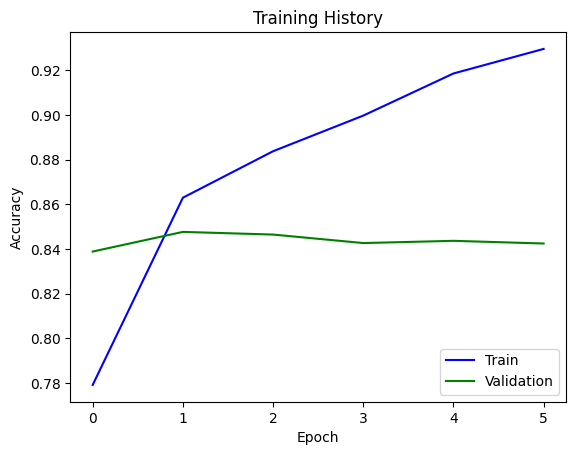

In [22]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [23]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.844
